In [1]:
import xarray as xr
import numpy as np
import xmitgcm
from matplotlib import pyplot as plt
import os
from glob import glob
%matplotlib inline

In [2]:
plt.rcParams['figure.figsize'] = (18,12)

In [14]:
import dask
from dask.diagnostics import ProgressBar
print(dask.__version__)
print(xr.__version__)

0.16.0
0.10.0


In [4]:
ddir = '/swot/SUM01/LLC/llc_4320_agulhas/'
all_files = sorted(glob(os.path.join(ddir, 'llc_4320_agulhas.0*.nc')))
print(len(all_files))
all_files[0], all_files[-1]

1752


('/swot/SUM01/LLC/llc_4320_agulhas/llc_4320_agulhas.0000010368.nc',
 '/swot/SUM01/LLC/llc_4320_agulhas/llc_4320_agulhas.0000262512.nc')

In [5]:
ds = xr.open_mfdataset(all_files[:24], decode_cf=False, autoclose=True, chunks={'k': 1, 'k_l': 1})
#ds = xr.open_dataset(all_files[], decode_cf=False, chunks={'k': 1, 'k_l': 1})
ds = ds.set_coords(['iter', 'face'])

In [6]:
grid = xr.open_dataset(ddir + 'llc_4320_agulhas_grid.nc')
ds = xr.merge([grid, ds])

In [7]:
import xmitgcm
ds = xmitgcm.mds_store._swap_dimensions(ds, geometry='sphericalpolar')

In [8]:
ds

<xarray.Dataset>
Dimensions:   (XC: 2160, XG: 2160, YC: 2160, YG: 2160, Z: 90, Zl: 90, Zp1: 91, Zu: 90, time: 24)
Coordinates:
  * YC        (YC) float32 -57.001 -56.99 -56.9789 -56.9678 -56.9567 ...
  * YG        (YG) float32 -57.0066 -56.9955 -56.9844 -56.9733 -56.9623 ...
  * XC        (XC) float32 -15.4896 -15.4688 -15.4479 -15.4271 -15.4062 ...
  * XG        (XG) float32 -15.5 -15.4792 -15.4583 -15.4375 -15.4167 ...
  * Zp1       (Zp1) float32 0.0 -1.0 -2.14 -3.44 -4.93 -6.63 -8.56 -10.76 ...
  * Z         (Z) float32 -0.5 -1.57 -2.79 -4.185 -5.78 -7.595 -9.66 -12.01 ...
  * Zl        (Zl) float32 0.0 -1.0 -2.14 -3.44 -4.93 -6.63 -8.56 -10.76 ...
  * Zu        (Zu) float32 -1.0 -2.14 -3.44 -4.93 -6.63 -8.56 -10.76 -13.26 ...
  * time      (time) float64 2.592e+05 2.628e+05 2.664e+05 2.7e+05 2.736e+05 ...
Data variables:
    face      (time) int64 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
    rA        (YC, XC) float32 ...
    rAw       (YC, XG) float32 ...
    rAs       (YG,

In [9]:
sst = ds.Theta[0,0].where(ds.hFacC[0]>0).load()

In [10]:
sss = ds.Salt[0,0].where(ds.hFacC[0]>0).load()

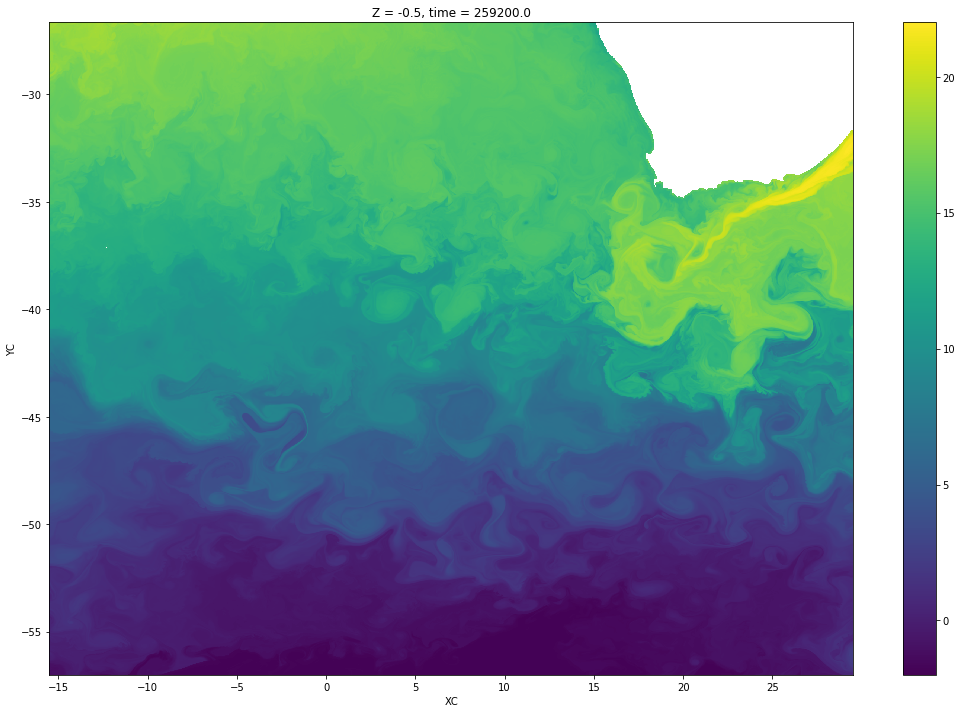

In [11]:
plt.figure(figsize=(18,12))
sst.plot(vmin=-2, vmax=22)

In [12]:
ds_daily = ds.mean(dim='time')
ds_daily

<xarray.Dataset>
Dimensions:   (XC: 2160, XG: 2160, YC: 2160, YG: 2160, Z: 90, Zl: 90, Zp1: 91, Zu: 90)
Coordinates:
  * YC        (YC) float32 -57.001 -56.99 -56.9789 -56.9678 -56.9567 ...
  * YG        (YG) float32 -57.0066 -56.9955 -56.9844 -56.9733 -56.9623 ...
  * XC        (XC) float32 -15.4896 -15.4688 -15.4479 -15.4271 -15.4062 ...
  * XG        (XG) float32 -15.5 -15.4792 -15.4583 -15.4375 -15.4167 ...
  * Zp1       (Zp1) float32 0.0 -1.0 -2.14 -3.44 -4.93 -6.63 -8.56 -10.76 ...
  * Z         (Z) float32 -0.5 -1.57 -2.79 -4.185 -5.78 -7.595 -9.66 -12.01 ...
  * Zl        (Zl) float32 0.0 -1.0 -2.14 -3.44 -4.93 -6.63 -8.56 -10.76 ...
  * Zu        (Zu) float32 -1.0 -2.14 -3.44 -4.93 -6.63 -8.56 -10.76 -13.26 ...
Data variables:
    face      float64 1.0
    rA        (YC, XC) float32 ...
    rAw       (YC, XG) float32 ...
    rAs       (YG, XC) float32 ...
    rAz       (YG, XG) float32 ...
    dxG       (YG, XC) float32 ...
    dyG       (YC, XG) float32 ...
    dxC       (YC,

[########################################] | 100% Completed | 25.4s
[########################################] | 100% Completed | 22.0s


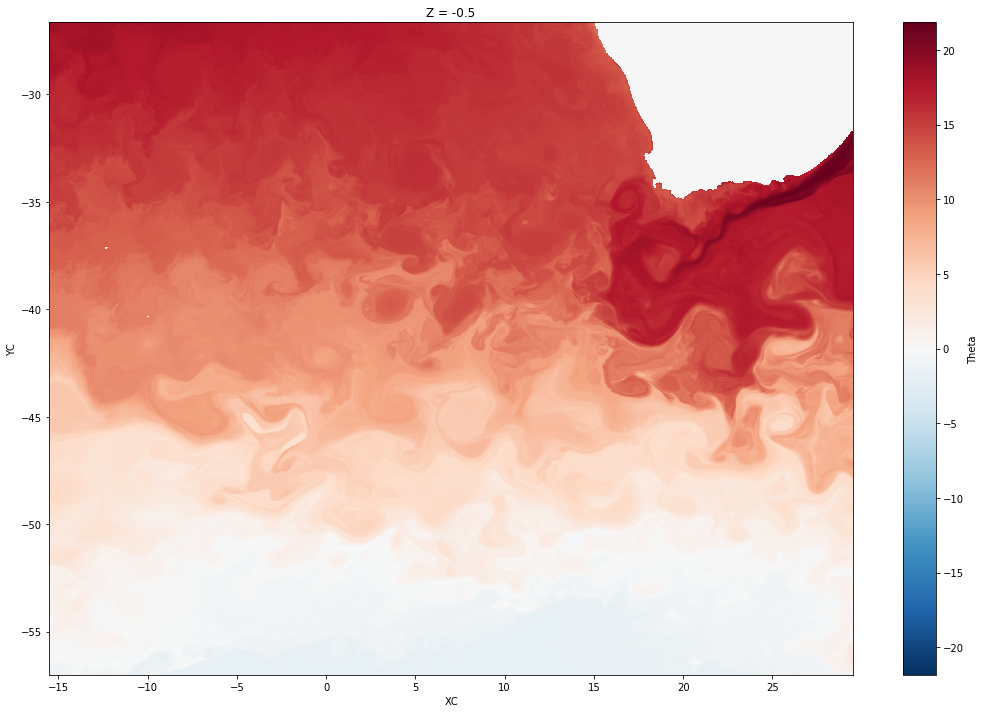

In [15]:
with ProgressBar():
    ds_daily.Theta[0].plot()

In [16]:
from xgcm import Grid

In [17]:
grid = Grid(ds, periodic=False)
grid

<xgcm.Grid>
X Axis (not periodic):
  * center   XC (2160) --> left
  * left     XG (2160) --> center
Y Axis (not periodic):
  * center   YC (2160) --> left
  * left     YG (2160) --> center
T Axis (not periodic):
  * center   time (24)
Z Axis (not periodic):
  * center   Z (90) --> left
  * right    Zl (90) --> center
  * outer    Zp1 (91) --> center
  * left     Zu (90) --> center

In [18]:
# need to rechunk or else apply_ufunc complains
u_c = grid.interp(ds.U, 'X', boundary='extend').chunk(ds.U.chunks)
v_c = grid.interp(ds.V, 'Y', boundary='extend').chunk(ds.V.chunks)
u_c

<xarray.DataArray 'mul-834c35f2d854c2f9400b9a77f0ba7528' (time: 24, Z: 90, YC: 2160, XC: 2160)>
dask.array<shape=(24, 90, 2160, 2160), dtype=float32, chunksize=(1, 1, 2160, 2160)>
Coordinates:
  * time     (time) float64 2.592e+05 2.628e+05 2.664e+05 2.7e+05 2.736e+05 ...
  * Z        (Z) float32 -0.5 -1.57 -2.79 -4.185 -5.78 -7.595 -9.66 -12.01 ...
  * YC       (YC) float32 -57.001 -56.99 -56.9789 -56.9678 -56.9567 -56.9456 ...
  * XC       (XC) float32 -15.4896 -15.4688 -15.4479 -15.4271 -15.4062 ...

In [19]:
ke = 0.5 * (u_c**2 + v_c**2)
surface_ke = ke[0, 0].load()

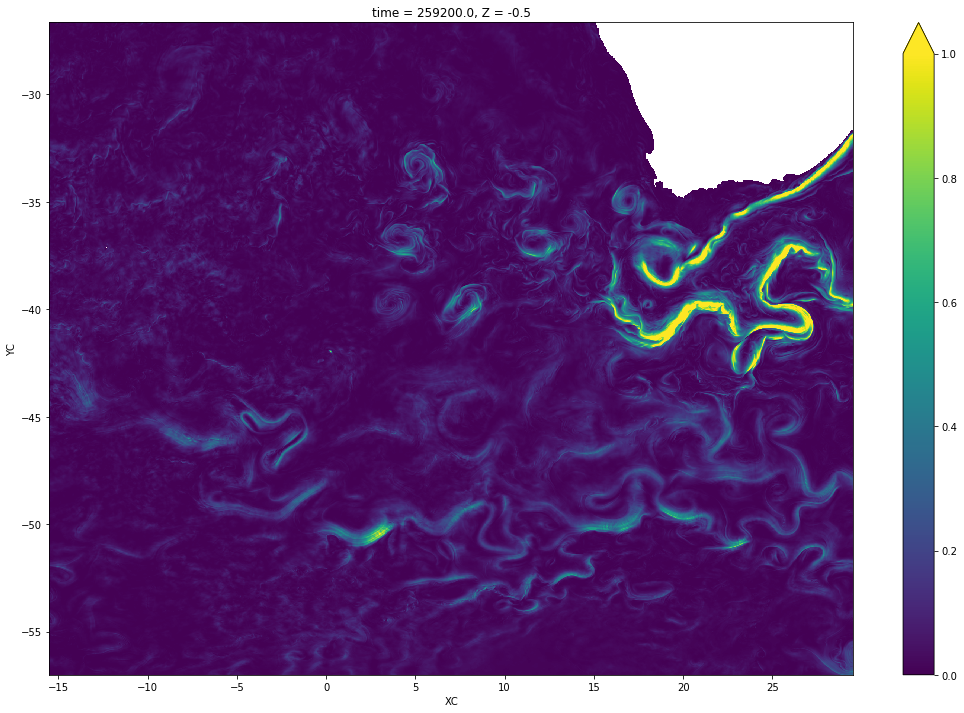

In [20]:
surface_ke.where(ds.hFacC[0]).plot(vmax=1)

In [21]:
2160 / 90

24.0

In [22]:
from skimage.measure import block_reduce

def _coarsen_2d_raw(signal, n_filt=90):
    ndim = 2
    block_size = (n_filt,) * ndim
    sig_coarse = block_reduce(signal, block_size) / n_filt**ndim
    # upsample back to original resolution
    return np.repeat(
            np.repeat(sig_coarse, n_filt, axis=-1),
            n_filt, axis=-2)

mask_vars = {('YC', 'XC'): 'hFacC',
             ('YC', 'XG'): 'hFacW',
             ('YG', 'XC'): 'hFacS'}

def coarsen_2d(data, n_filt=90, mask=False):
    coarsen_raw = lambda data : _coarsen_2d_raw(data, n_filt=n_filt)
    
    xdim = 'XC' if 'XC' in data.dims else 'XG'
    ydim = 'YC' if 'YC' in data.dims else 'YG'
    dims = (ydim, xdim)
    
    if mask:
        data_masked = data.where(ds[mask_vars[dims]])
    else:
        data_masked = data.fillna(0.)
        
    return xr.apply_ufunc(coarsen_raw, data_masked,
                          vectorize=True,
                          dask='parallelized',
                          input_core_dims = [dims],
                          output_core_dims = [dims],
                          output_dtypes=[data.dtype])
    


In [23]:
u_c_coarse = coarsen_2d(u_c)
v_c_coarse = coarsen_2d(v_c)
ke_coarse = 0.5 * (u_c_coarse**2 + v_c_coarse**2)

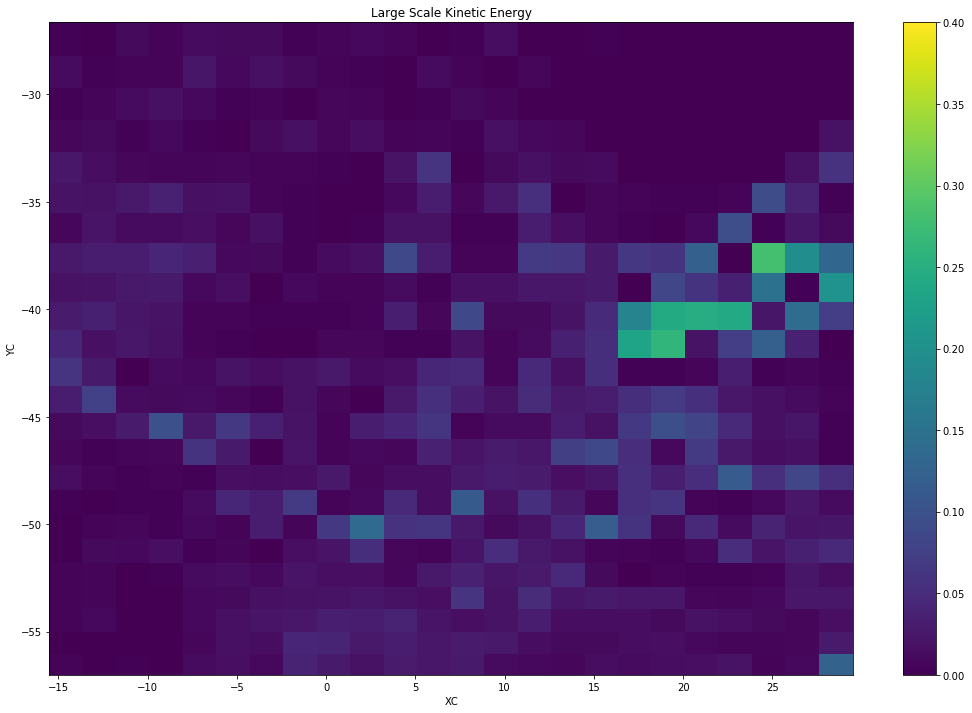

In [24]:
surface_ke_coarse = ke_coarse[0, 0]
surface_ke_coarse.plot(vmax=0.4)
plt.title('Large Scale Kinetic Energy')

In [25]:
surface_ke_full = coarsen_2d(surface_ke)
surface_ke_small = surface_ke_full - surface_ke_coarse

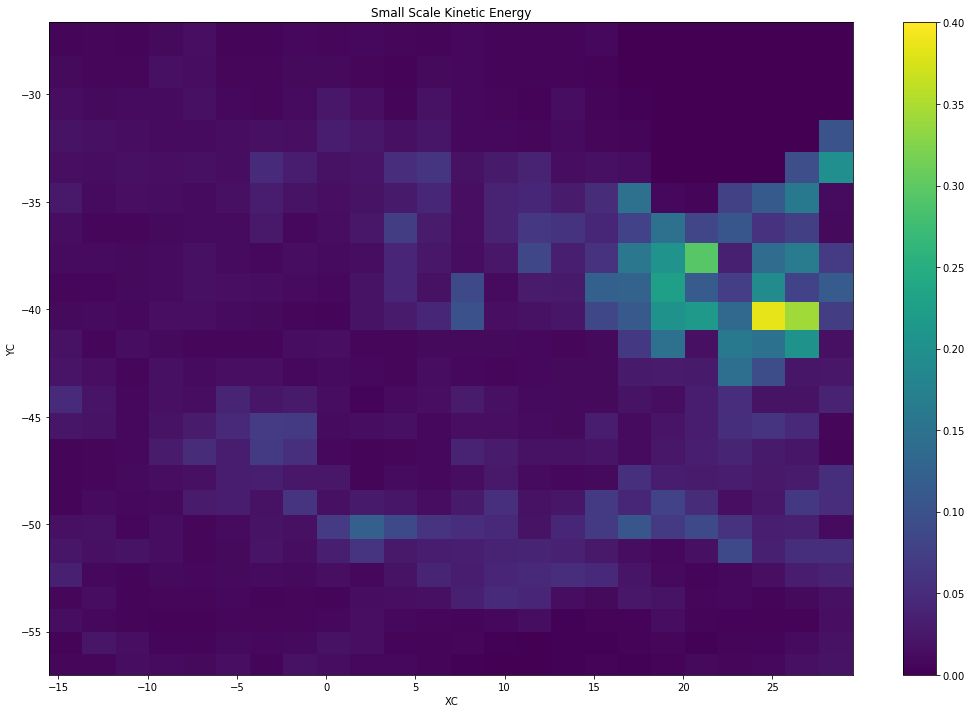

In [26]:
surface_ke_small.plot(vmax=0.4)
plt.title('Small Scale Kinetic Energy')


In [27]:
u_coarse = coarsen_2d(ds_daily.U)
v_coarse = coarsen_2d(ds_daily.V)
w_coarse = coarsen_2d(ds_daily.W)
theta_coarse = coarsen_2d(ds_daily.Theta)

In [28]:
# using the Su definition
theta_fine = ds_daily.Theta - theta_coarse
w_fine = ds_daily.W - w_coarse
w_fine

<xarray.DataArray 'W' (Zl: 90, YC: 2160, XC: 2160)>
dask.array<shape=(90, 2160, 2160), dtype=float32, chunksize=(1, 2160, 2160)>
Coordinates:
  * YC       (YC) float32 -57.001 -56.99 -56.9789 -56.9678 -56.9567 -56.9456 ...
  * XC       (XC) float32 -15.4896 -15.4688 -15.4479 -15.4271 -15.4062 ...
  * Zl       (Zl) float32 0.0 -1.0 -2.14 -3.44 -4.93 -6.63 -8.56 -10.76 ...

In [30]:
zlev = 20
with ProgressBar():
    theta_load = theta_fine[zlev].load()

[########################################] | 100% Completed | 32.0s


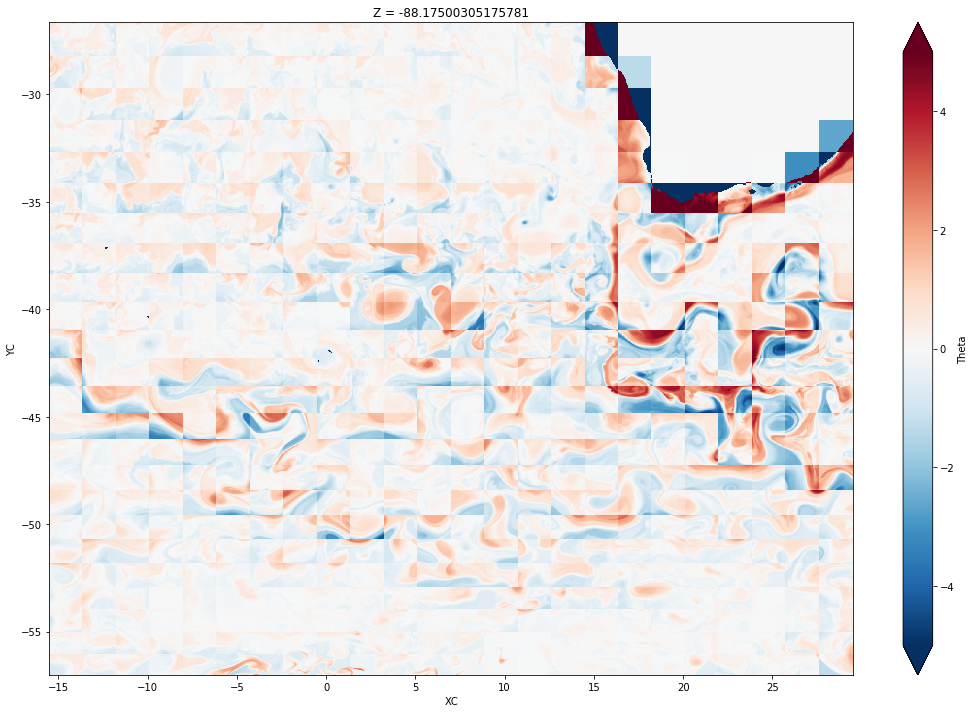

In [31]:
theta_load.plot(vmax=5)

In [ ]:
with ProgressBar():
    w_load = w_fine[zlev].load()

In [ ]:
w_load.plot(vmax=1e-3)